<a href="https://colab.research.google.com/github/rafasuzuki/DataScience/blob/main/An%C3%A1lise_de_Dados_do_Airbnb_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Nova York
O [Airbnb](https://www.airbnb.com.br/) é um um serviço online onde as pessoas anunciam e reservam acomodações. Nascida em 2008 em San Francisco, hoje é considerada a  **maior empresa hoteleira da atualidade**, sendo que a empresa não possui um único quarto de hotel.

A empresa faz a conexão entre o hospede e o anfitrião que deseja alugar seu imóvel de uma maneira simples e rápida. 

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas em todo o mundo, tornando-se uma grande concorrência as redes hoteleiras tradicionais.

A empresa disponibiliza dados em seu site para algumas das principais cidades do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**


# Nova York

A cidade de Nova York foi fundada em 1624 como um posto de comércio por colonos holandeses, sendo nomeada como Nova Amsterdã. Seu nome só foi alterado para a atual quando as terras foram passadas para o poder do Duque de York.

Hoje a cidade de Nova York é a terceira mais populosa da América e exerce um grande impacto nas áreas do comércio, finanças, mídia, arte, moda, pesquisa, tecnologia, educação e entretenimento de todo o planeta.

A cidade recebe cerca de 50 milhões de visitantes anuais, a estátua da Liberdade e a Time Squere onde se localiza os famosos teatros da Broadway, são um dos pontos mais frequentados pelos turistas.

O distrito financeiro de Nova York, ancorado por Wall Street, atua como um dos maiores centros financeiros do mundo, o lar da Bolsa de Valores de Nova York, a maior bolsa de valores do planeta pelo total de capitalização de mercado de suas empresas listadas.

<center><img alt="Analisando Airbnb" width="100%" src="https://cdn2.civitatis.com/estados-unidos/nueva-york/guia/manhattan.jpg"></center>


## Obtenção dos Dados

Neste notebook foram usados os dados obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*

In [3]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv')


## Análise dos Dados

Para uma maior facilidade e entendimento dos dados coletados apresentaremos aqui uma legenda para as variáveis no *dataset*.


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Boroughs (Regiões administrativas)
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Para podermos iniciar a análise, vamos verificar a estrutura do *dataset*, analisando as primeiras 5 entradas.


In [5]:
# mostrando as 5 primeras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para prosseguirmos, a partir daqui, iremos verificar a quantidade de entradas que nosso *dataset* possui e ver os tipos de cada coluna.

Lembrando que este conjunto de dados `listings.csv` é uma versão "resumida" do Airbnb. Existe uma versão mais completa deste *dataset* no mesmo site onde foram extraídos os dados para essa análise(`listings.csv.gz`).




In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36905
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

As variáveis `reviews_per_month` e `last_review` têm em torno de 20% dos valores nulos. Porém nesta análise não utilizaremos essas variáveis.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para visualizar a distribuição das variáveis, iremos plotar um histograma.






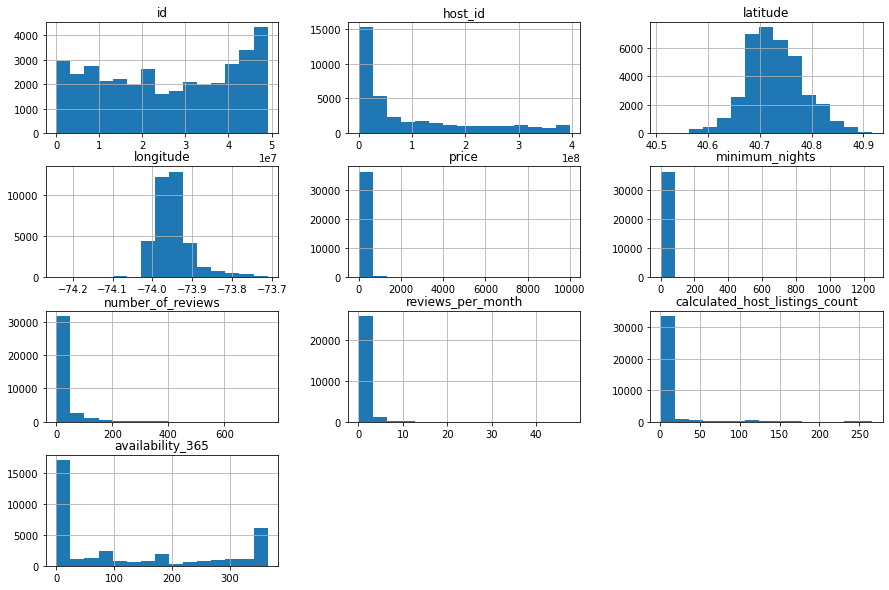

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Olhando para a distribuição do histograma referente as variáveis `price` e `minimum_nights`, podemos cogitar a presença de *outliers*.


Os valores distorcem a representação gráfica. Sendo assim, há duas maneiras que podem nos auxiliar com a detecção dos *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [13]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36905.000000,36905.000000,36905.000000,27185.000000,36905.000000,36905.000000
mean,148.559274,23.123235,22.668636,0.854783,11.071318,123.697087
std,290.379973,26.546473,48.003378,1.349439,36.699390,143.178789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.100000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.340000,1.000000,54.000000
75%,160.000000,30.000000,20.000000,1.090000,3.000000,269.000000
max,10000.000000,1250.000000,755.000000,47.600000,266.000000,365.000000


Aqui conseguimos analisar alguns pontos:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o Q3 está em 160 dólares, mas o máximo está em 10 mil dórales. Podemos com isso concluir que existem *outliers* nesse atributo.
* A variável `minimum_nights` tem como seu máximo o valor 1250, sendo que o Q3 está em 30. Temos mais *outliers* identificados.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também podem conter *outliers*, mas não vamos nos preocupar com elas nesta análise.

## Regra IQR Score

Uma vez identificado a presença de outliers em nosso *dataset*, iremos calcular os limites usando a regra do IQR Score.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil(25%)

# IQR = Q3 - Q1

<center><img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" height="200px"></center>

In [14]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IRQ_price = q3_price - q1_price
print('IRQ da variável price:', IRQ_price)

# definindo os limites 
sup_price = q3_price + 1.5 * IRQ_price
inf_price = q1_price - 1.5 * IRQ_price

print("Limite superior de price:", sup_price)
print("Limite inferior de price:", inf_price)

IRQ da variável price: 99.0
Limite superior de price: 308.5
Limite inferior de price: -87.5


In [18]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  26.0
Limite superior de minimum_nights:  69.0
Limite inferior de minimum_nights:  -35.0


## Histogramas sem *outliers*

Agora que calculamos o IQR, podemos limpar o *DataFrame* removendo os *outliers* e plotar novamente o histograma sem as distorções anteriores.

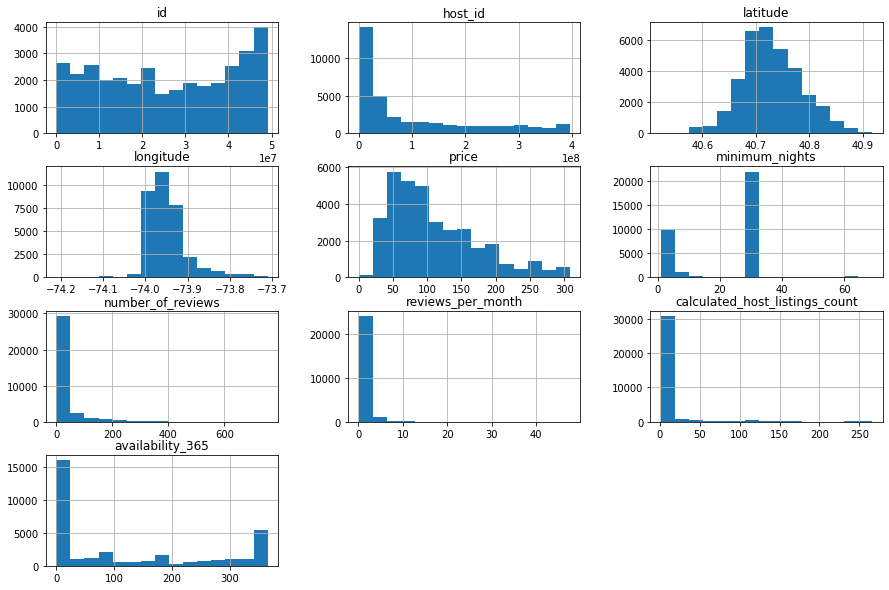

In [19]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 308.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 69.0].index, axis=0, inplace=True)



# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [30]:
#verificando a distribuição estatística dos dados limpos
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,34101.000000,34101.000000,34101.000000,25518.000000,34101.000000,34101.000000
mean,110.107240,21.238849,23.458491,0.869025,10.996569,120.323422
std,64.077108,13.135582,48.993873,1.372331,36.016355,142.108245
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,95.000000,30.000000,4.000000,0.350000,1.000000,47.000000
75%,150.000000,30.000000,21.000000,1.110000,3.000000,262.000000
max,308.000000,69.000000,755.000000,47.600000,266.000000,365.000000


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos *outliers*.

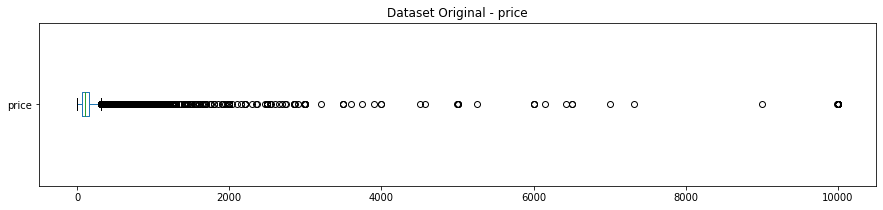

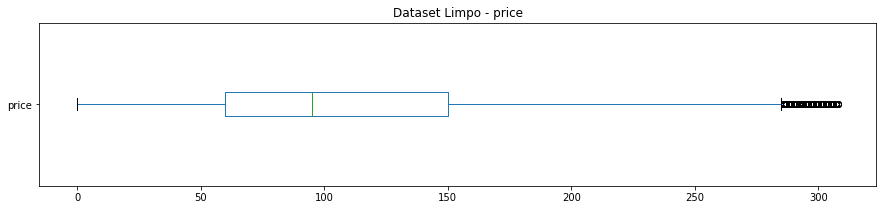

Tamanho original: 36905 entradas
Tamanho atual: 34101 entradas


In [34]:
#verificando o conjunto original para price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()

#verificando o conjunto limpo para price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print('Tamanho original: {} entradas'.format(df.shape[0]))
print('Tamanho atual: {} entradas'.format(df_clean.shape[0]))

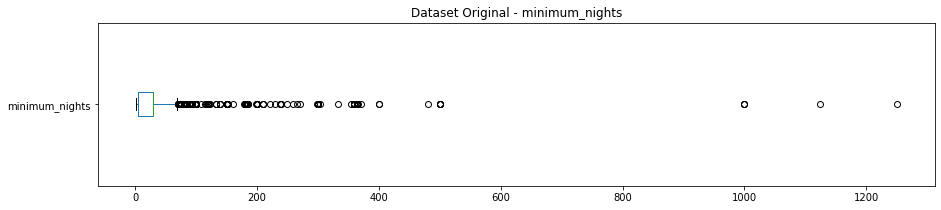

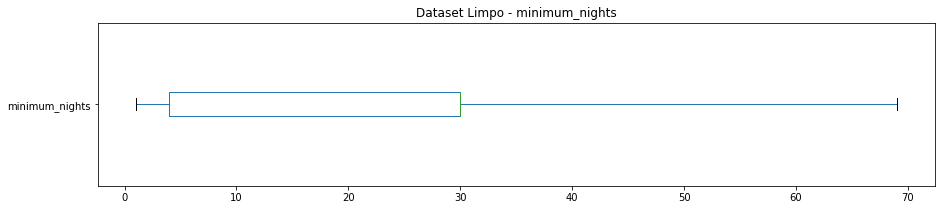

Tamanho original: 36905 entradas
Tamanho atual: 34101 entradas


In [35]:
#verificando o conjunto original para minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

#verificando o conjunto limpo para minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print('Tamanho original: {} entradas'.format(df.shape[0]))
print('Tamanho atual: {} entradas'.format(df_clean.shape[0]))

Podemos ver aqui o resultado da limpeza dos nossos dados.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.



### **Q4. Qual a média dos preços de aluguel?**
Agora que temos um *dataset* limpo, podemos verificar a média dos preços de aluguéis em nosso conjunto de dados.

In [36]:
# ver a média da coluna `price``
price_mean = int(df_clean.price.mean())
print('$', price_mean, '.00')


$ 110 .00


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [21]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.006030,-0.009509,-0.027380,-0.007106,0.018246
minimum_nights,-0.006030,1.000000,-0.258531,-0.396415,0.119316,-0.129283
number_of_reviews,-0.009509,-0.258531,1.000000,0.669162,-0.107276,0.143808
reviews_per_month,-0.027380,-0.396415,0.669162,1.000000,-0.009318,0.196639
calculated_host_listings_count,-0.007106,0.119316,-0.107276,-0.009318,1.000000,0.219373
availability_365,0.018246,-0.129283,0.143808,0.196639,0.219373,1.000000


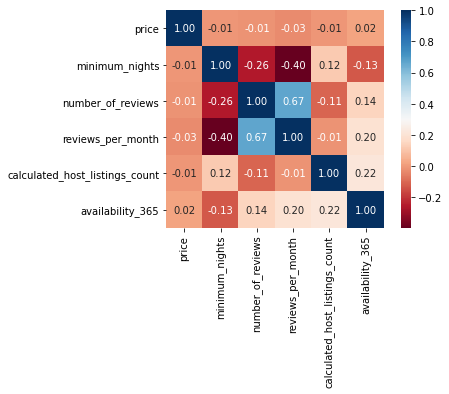

In [31]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Ao utilizar a plataforma do Airbnb, você pode escolher o tipo de locação em qual deseja se instalar. Apartamento/casa inteira, apenas um quarto ou mesmo dividir um quarto com outras pessoas, todas essas informações podemos achar na variável `room_type`.



Utilizaremos o método `value_counts()` para contar as ocorrências de cada tipo de aluguel em nossa coluna  `room_type`. 




In [41]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18270
Private room       16168
Shared room          634
Hotel room           269
Name: room_type, dtype: int64

In [42]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.516963
Private room       0.457486
Shared room        0.017940
Hotel room         0.007612
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Nova York?**

Antes de entrarmos em qual localidade é a mais cara da cidade de Nova York temos que entender como funciona a divisão da cidade.
Nova York possui 5 boroughs (algo similar a distrito), composta por  Manhattan, Brooklyn, Queens, Staten Island e Bronx.

Cada borough tem seus próprios bairros. Para acharmos a localidade mais cara da cidade, iremos analisar os boroughs e assim representar totalidade de locações de uma região. Se analisarmos por bairros, alguns bairros podem ter valores discrepantes alterando as informações estatíscas.

<center><img alt="Analisando Airbnb" width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/1200px-5_Boroughs_Labels_New_York_City_Map.svg.png"></center>

Para acharmos qual é a localidade mais cara da cidade de Nova York iremos utilizar a função `groupby()`. Essa função nos permite verificar uma variável em função de outra. No caso as variáveis `price` e `neighbourhood_group`.

In [32]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:15]

neighbourhood_group
Manhattan        129.114319
Brooklyn         101.683504
Staten Island     94.611307
Bronx             85.386364
Queens            82.352273
Name: price, dtype: float64

Em nosso *dataset* nos é fornecido a Latitude e Longitude de cada imóvel com isso é possível plotar cada ponto. Considera-se `x=longitude` e `y=latitude`.

Podemos ver que a ilha de Manhattan e regiões ao redor dela como o Brooklyn e Queens estão bem destacados. Mostrando que essas são as regiões com mais locações, e consequentemente, as mais frequentadas pelos turistas.

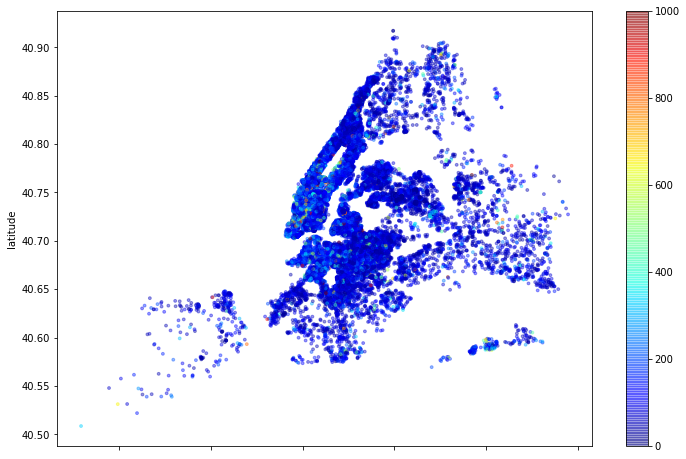

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Analisando o histograma plotado para a variável `minimum_nights`, podemos ver que os locais a serem alugados em sua maioria, correspondem a 30 dias.
Outra parcela dos aluguéis correspondem a média de 2 ou 3 dias. Provavelmente relativos a turismo. Com isso a média de mínimo de noites para aluguel fica em torno de 20 dias.

In [23]:
df_clean.minimum_nights.mean()

21.238849300607022

## Conclusões

Com base nessa análise superficial  feita com os dados do Airbnb, podemos ver que temos um mínimo de dados ausentes. Mas mesmo assim, ainda se apresenta como um bom *dataset* para  estudo.

Com poucos imóveis em determinadas regiões, algumas localidades podem distorcer as informações estatísticas de alguns atributos.

Para uma abordagem inicial este *dataset* é o suficiente, lembrando que se trata de uma versão resumida. Para uma análise exploratória mais profunda, recomenda-se o uso de um *dataset* completo, que se encontra no mesmo site aonde foi retirado esse, possuindo 106 variáveis.
